In [1]:
import numpy as np 
import pandas as pd
import requests
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', 
                 delimiter=',', index_col='Date')
df.index = pd.to_datetime(df.index)
# pd.date_range(start='1981-01-01', end='1990-12-31')
df = df.asfreq(freq='D')
df['Temp'] = df['Temp'].interpolate()
df['Temp'] = np.where(df['Temp']<=0, 0.00001, df['Temp'])
df.head()
df.tail()
df.shape
df.isnull().sum()


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


,Temp
Date,
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


(3652, 1)

Temp    0
dtype: int64

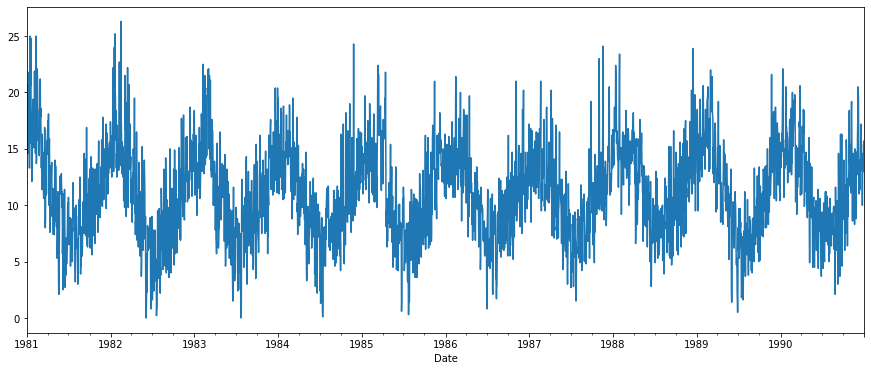

In [3]:
df['Temp'].plot(figsize=(15, 6));


In [4]:
forecast_horizon = 365
steps = 280
N_test = len(df) - forecast_horizon - steps + 1

trend_type_list = ['add', 'mul']
seasonal_type_list = ['add', 'mul']
damped_trend_list = [True, False]
init_method_list = ['estimated', 'heuristic', 'legacy-heuristic']
use_boxcox_list = [True, False, 0]

errors = []
sent_last = False

alpha = 0.2
df['Temp_EWMA'] = df['Temp'].ewm(alpha=alpha, adjust=False).mean()


### Walk Forward Validation

In [ ]:
def walkForwardValidation(trend_type, seasonal_type, damped_trend, init_method, use_boxcox):
    #### 

In [81]:
N_test = 300
train = df.iloc[:-N_test, :]
test = df.iloc[-N_test:, :]


In [82]:
es = ExponentialSmoothing(train['Temp'], initialization_method='legacy-heuristic', 
                          trend='add', seasonal='add', seasonal_periods=365)

res = es.fit()


In [83]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]


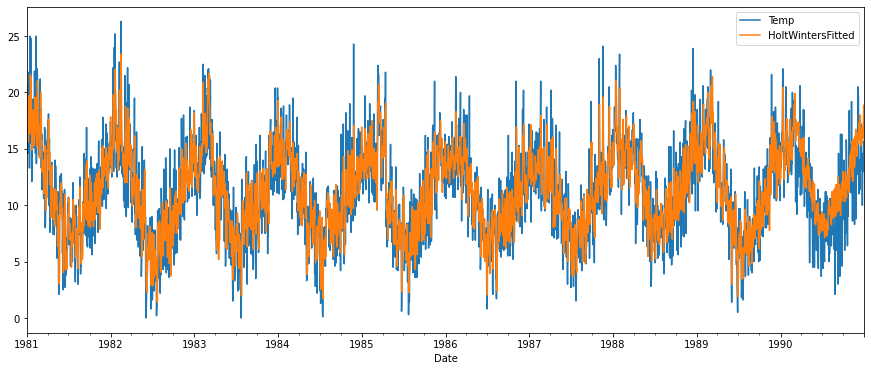

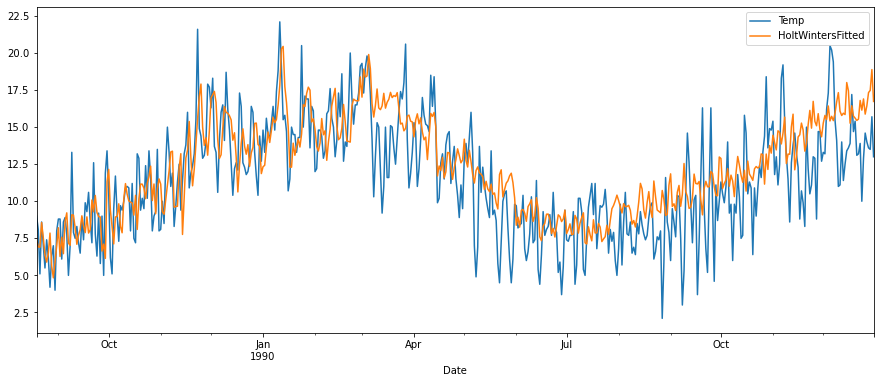

In [84]:
df.loc[train_idx, 'HoltWintersFitted'] = res.fittedvalues
df.loc[test_idx, 'HoltWintersFitted'] = res.forecast(N_test).values
df[['Temp', 'HoltWintersFitted']].plot(figsize=(15, 6));
df[['Temp', 'HoltWintersFitted']].tail(500).plot(figsize=(15, 6));



In [85]:
def rmse(y, t):
    return np.sqrt(np.mean(y - t) ** 2)

def mae(y, t):
    return np.mean(np.abs(y - t))


In [86]:
print(f'Train RMSE: {rmse(train.Temp, res.fittedvalues)}')
print(f'Test RMSE: {rmse(test.Temp, res.forecast(N_test))}')

print(f'Train MAE: {mae(train.Temp, res.fittedvalues)}')
print(f'Test MAE: {mae(test.Temp, res.forecast(N_test))}')


Train RMSE: 6.983294115576494e-05
Test RMSE: 1.3293980639828902
Train MAE: 1.9405075954112618
Test MAE: 2.408567745208038


### try train & test: Multiplicative Model

In [87]:
es_multiple = ExponentialSmoothing(train['Temp'], initialization_method='legacy-heuristic', 
                          trend='mul', seasonal='mul', seasonal_periods=365)

res_multiple = es_multiple.fit()


/Users/jiunyiyang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


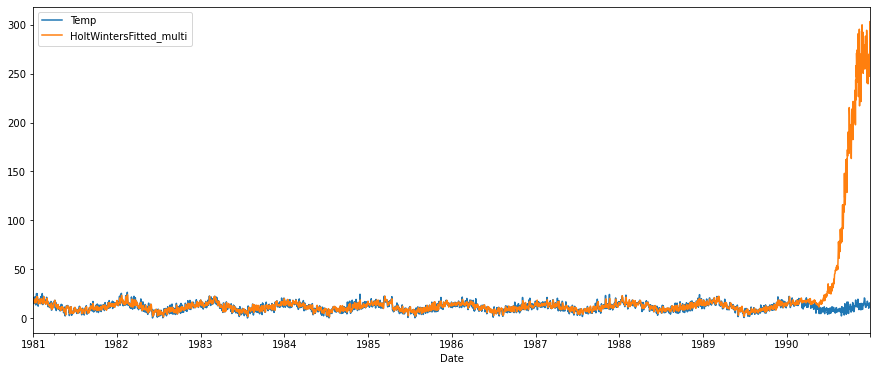

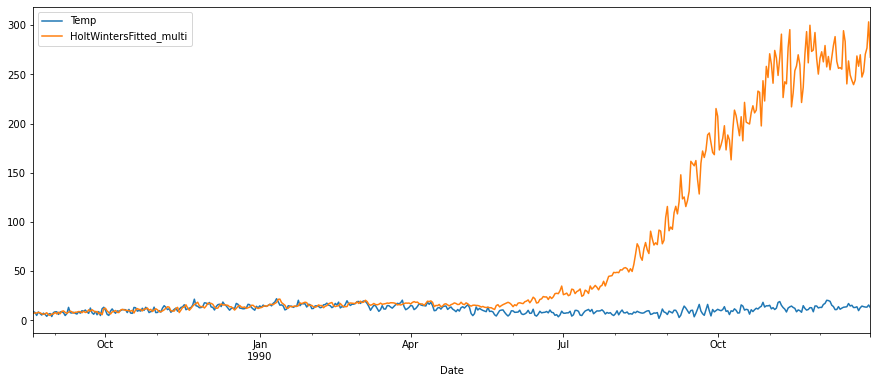

In [88]:
df.loc[train_idx, 'HoltWintersFitted_multi'] = res_multiple.fittedvalues
df.loc[test_idx, 'HoltWintersFitted_multi'] = res_multiple.forecast(N_test).values
df[['Temp', 'HoltWintersFitted_multi']].plot(figsize=(15, 6));
df[['Temp', 'HoltWintersFitted_multi']].tail(500).plot(figsize=(15, 6));


> Oops, multiplicative model is overfitting and cannot converge 